In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#read file
profitby_p=pd.read_csv('Coffee_company.csv', index_col=0)

In [3]:
#check columns
profitby_p.head()
profitby_p.columns

Index(['Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [4]:
#clean columns
profitby_p.columns=profitby_p.columns.str.replace(' ', '')


In [5]:
#check data in columns
profitby_p['Profit'].head()
#additional cleaning
profitby_p['Profit']=profitby_p['Profit'].str.replace('$', '').str.replace(',', '')

In [6]:
#checkdata
profitby_p['Profit'].head()
#set it to numeric
profitby_p['Profit']=pd.to_numeric(profitby_p['Profit'], errors='coerce')

In [7]:
#check the products column 
profitby_p['Product'].head()

Segment
Beverages     Robusta 
Beverages     Robusta 
Snacks        Robusta 
Snacks        Robusta 
Snacks        Robusta 
Name: Product, dtype: object

In [7]:
#groupby and sum, reset index because a bar plot will be used
grp=profitby_p.groupby('Product')['Profit'].sum().reset_index()
grp.head()

,Product,Profit
0,Arabica,7607654.04
1,Blue Mountain Coffee,12978662.46
2,Bourbon,5986470.00
3,Caturra,7283074.70
4,Robusta,6574252.04


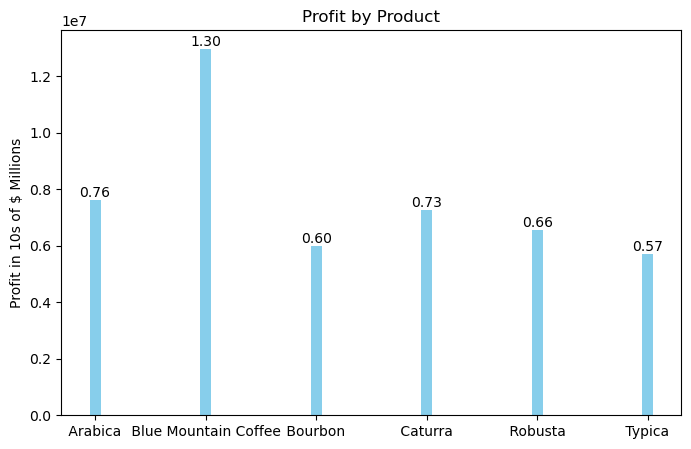

In [8]:
#bar plot
plt.figure(figsize=(8,5))
plt.bar(x=grp['Product'], height=grp['Profit'], color='skyblue', width=0.1)
plt.ylabel('Profit in 10s of $ Millions')
plt.title('Profit by Product')
plt.show
for i, value in enumerate(grp['Profit']):
    plt.text(i, value + 0.2, f'{(value/10000000):.2f}', ha='center', va='bottom')